In [1]:
include("framework.jl")
include("create.jl")
using JLD2
using PyPlot

mainPath=".."
configPath=mainPath*"/data/config"
outputPath=mainPath*"/data/output"
jlOutputPath=mainPath*"/data/julia"

"../data/julia"

In [2]:
# CASTELLANO
centumMumToM = 10^(-4) 
rho_w = 999.84 * 10^(3) # g / m^3
LWC( r_d, N_d ) = ( 4/3 ) * pi * r_d ^ 3 * N_d * rho_w

N_d( d, n ) = 1.0 / d^3 * (1 - 1.0/n^3)
N_i( d, n ) = 1.0 / ( n * d )^3

# [LENGTHS] = m; [TIME] = s; [MASS] = g
function CapCasOne(n, d, r_i, r_d)
    K = 1.34 * 10^(-3)
    LWC_ = LWC( r_d, N_d( d, n ) )
    return r_i * ( 1 + K * r_i/r_d * sqrt( LWC_ ))
end


CapCasOne (generic function with 1 method)

In [3]:
CapCasOne(12, centumMumToM * 2,  centumMumToM * 0.35,  centumMumToM * 0.1)/centumMumToM

0.3875473898228168

0.3221171932231755
0.304587677702983
0.2851404928356587
0.2530769885338308


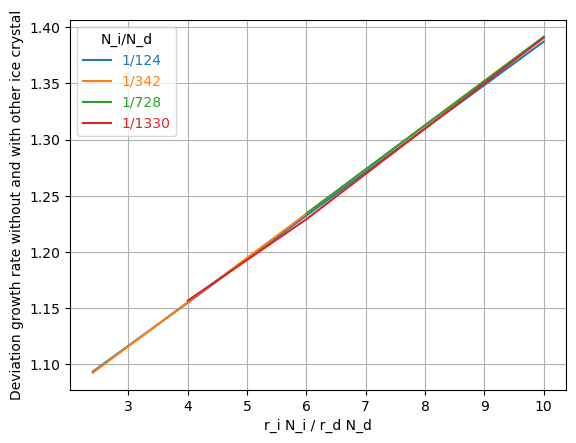

0.3224382216844989
0.2847624507348976
0.2523614418368007
0.2847183584609901
0.2523074072562103
0.3040932862330583
0.2859108966293228
0.2524674163591125


In [6]:
DIM = [ 5, 7, 9, 11 ]
d = 15 # 100 mum
r_i = 0.35 # 100 mum 
#r_iOr_d = [ 2.4, 4.0, 6.0, 10.0 ]
r_iOr_d = [ 2.4, 4.0, 6.0, 10.0 ]
r_d = r_i ./ r_iOr_d

fig = figure()
cap_index=1

for (ind_dim, dim) in enumerate(DIM)
    x = Float64[]; y = Float64[]; y2 = Float64[]
    for (ind_f, f) in enumerate(r_iOr_d)
        #df = DataFrame()
        try 
            config, cap = read_data( outputPath, "cubic_$(dim)_$(ind_f)", true )
            yElem = getindex(cap, cap_index)
            yOne = CapCasOne(dim, centumMumToM * d,  centumMumToM * r_i,  centumMumToM * r_d[ind_f]) / centumMumToM
            push!(y, yOne/yElem)
            push!(x, f )#* 1 / (dim^3 - 1) )
        catch
            continue
        end
    end

    if size(x, 1) > 0; plot( x, y, label="1/$(dim^3 - 1)" ); end
end
legend(labelcolor="linecolor", title="N_i/N_d")	
xlabel("r_i N_i / r_d N_d")
ylabel("Deviation growth rate without and with other ice crystal")
grid()

display(fig)

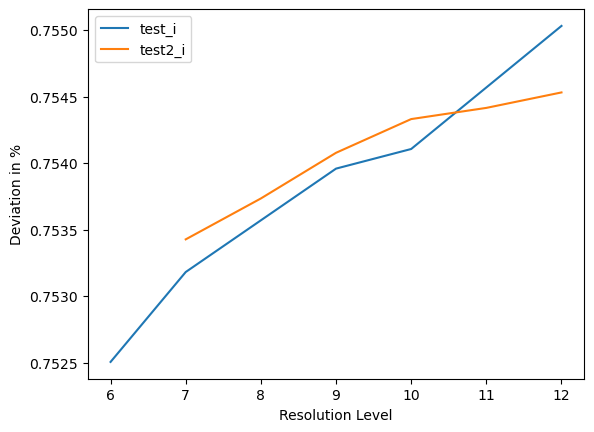

In [12]:
SimNames = [ "test_i", "test2_i" ]
fig = figure()

capInd = 1

for simName in SimNames
    df = DataFrame()
    x = Float64[]; y = Float64[]; ySfc = Float64[]
    for ind = 6:12
        try
            config, cap = read_data( outputPath, "$(simName)_$(ind)", false )
            # config, capSfc = read_data( outputPath, "$(simName)_$(ind)", true )
            push!( x, ind )
            push!( y, getindex(cap, capInd) )            
            # push!( ySfc, getindex(capSfc, capInd) )
        catch
            continue
        end
    end
    #y = ( y.- y[end] ) ./ y[end] .* 100
    plot( x, y, label=simName )
    # plot( x, ySfc, label=simName*"_sfc" )
end

legend()
xlabel("Resolution Level")
ylabel("Deviation in %")

display(fig)

In [13]:
function process_files( outputPath, simName, index )
    x = Int[]
    y = Float64[]

    for file in readdir(outputPath, join=true)
        # Extract the index from the filename if it follows the pattern "$(simName)_$(index)"
        pattern = "^$(simName)_\\d+\\.log\$"
        my_regex = Regex(pattern)
        match = Base.match(my_regex, basename(file))
        if match !== nothing
            # ind = parse(Int, match.captures[1])
            # extract the index from the filename
            ind = parse(Int, split(split(basename(file), "_")[2], ".")[1])
            try
                config, cap = read_data(outputPath, "$(simName)_$(ind)")
                push!(x, ind)
                push!(y, getindex(cap, index))
            catch
                continue
            end
        end
    end

    return x, y
end

process_files (generic function with 1 method)

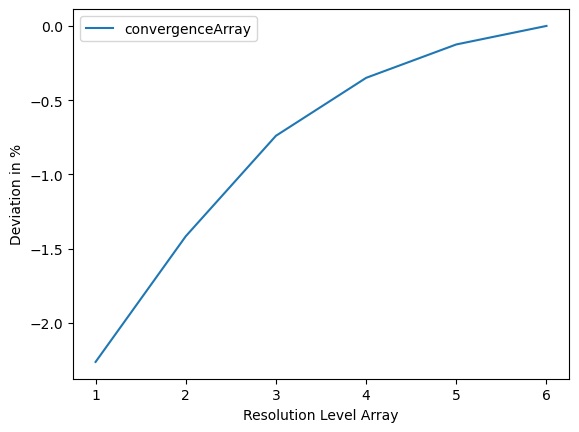

In [97]:
SimNames = [ "convergenceArray" ]
fig = figure()

for simName in SimNames
    df = DataFrame()

    x, y = process_files( outputPath, simName, 4 )

    y = ( y.- y[end] ) ./ y[end] .* 100

    plot( x, y, label=simName )
end

legend()
xlabel("Resolution Level Array")
ylabel("Deviation in %")

display(fig)

In [ ]:
for ()
./runMeshEnsemble.sh -m "$name" -c "$name" -M "2700"

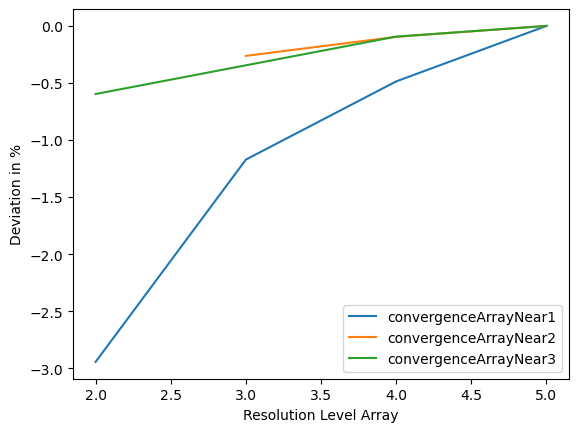

In [98]:
SimNames = [ "convergenceArrayNear$i" for i in 1:3 ]
fig = figure()

for simName in SimNames
    df = DataFrame()

    x, y = process_files( outputPath, simName, 4 )

    y = ( y.- y[end] ) ./ y[end] .* 100

    plot( x, y, label=simName )
end

legend()
xlabel("Resolution Level Array")
ylabel("Deviation in %")

display(fig)